# Mushroom data testing

In [2]:
# Some settings that you can adjust

# When set to False, the code will attempt to load a new copy from the UCI dataset instead.
# It makes no difference. They are identical.
load_from_csv = True

# Affects test data split
random_seed = 42

## Loading data and preprocessing

1. Load the Mushroom Data Set and define the column names
2. Separate features (X) and the target variable (y)
3. Use Label Encoding to convert categorical variables to numerical format
4. Use One-Hot Encoding to further convert the categorical variables
5. Split the dataset into training and testing set
    * X_train, X_test, y_train, and y_test

In [3]:
import pandas as pd

if not load_from_csv:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
    columns = [
        "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor",
        "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
        "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
        "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
        "ring_number", "ring_type", "spore_print_color", "population", "habitat"
    ]
    mushroom_data = pd.read_csv(url, header=None, names=columns)
else:
    mushroom_data = pd.read_csv("dataset.csv")

# Peek at dataset
print("Original Dataset:")
print(mushroom_data)

Original Dataset:
     class cap_shape cap_surface cap_color bruises odor gill_attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0        

In [4]:
# Class distribution
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

# Attribute summary statistics
attribute_summary = mushroom_data.describe()
print(attribute_summary)

class
e    4208
p    3916
Name: count, dtype: int64
       class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
count                    8124                   8124      8124       8124   
unique                      9   

In [5]:
# Note: This code matches our backend model
# Process 22 attributes
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

mushroom_data = pd.read_csv("dataset.csv")

# This holds on to the encoders and only exists for the backend
encoders = {}

for column_name in mushroom_data.columns:
    encoders[column_name] = LabelEncoder()
    mushroom_data[column_name] = encoders[column_name].fit_transform(mushroom_data[column_name])

y = mushroom_data['class']
X = mushroom_data.drop('class', axis=1)
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed)

log_model = LogisticRegression(random_state=42)

log_model.fit(X_train, y_train)

print(log_model.score(X_test, y_test))

0.952


## Correlation Matrix

1. Concatenate the features (X_encoded) and the target variable (y) to create a single DataFrame for the correlation matrix
    * Encoded the target variable `class` using LabelEncoder
2. Calculate the Pearson correlation matrix using the corr() method.
3. Use seaborn to create a heatmap and display


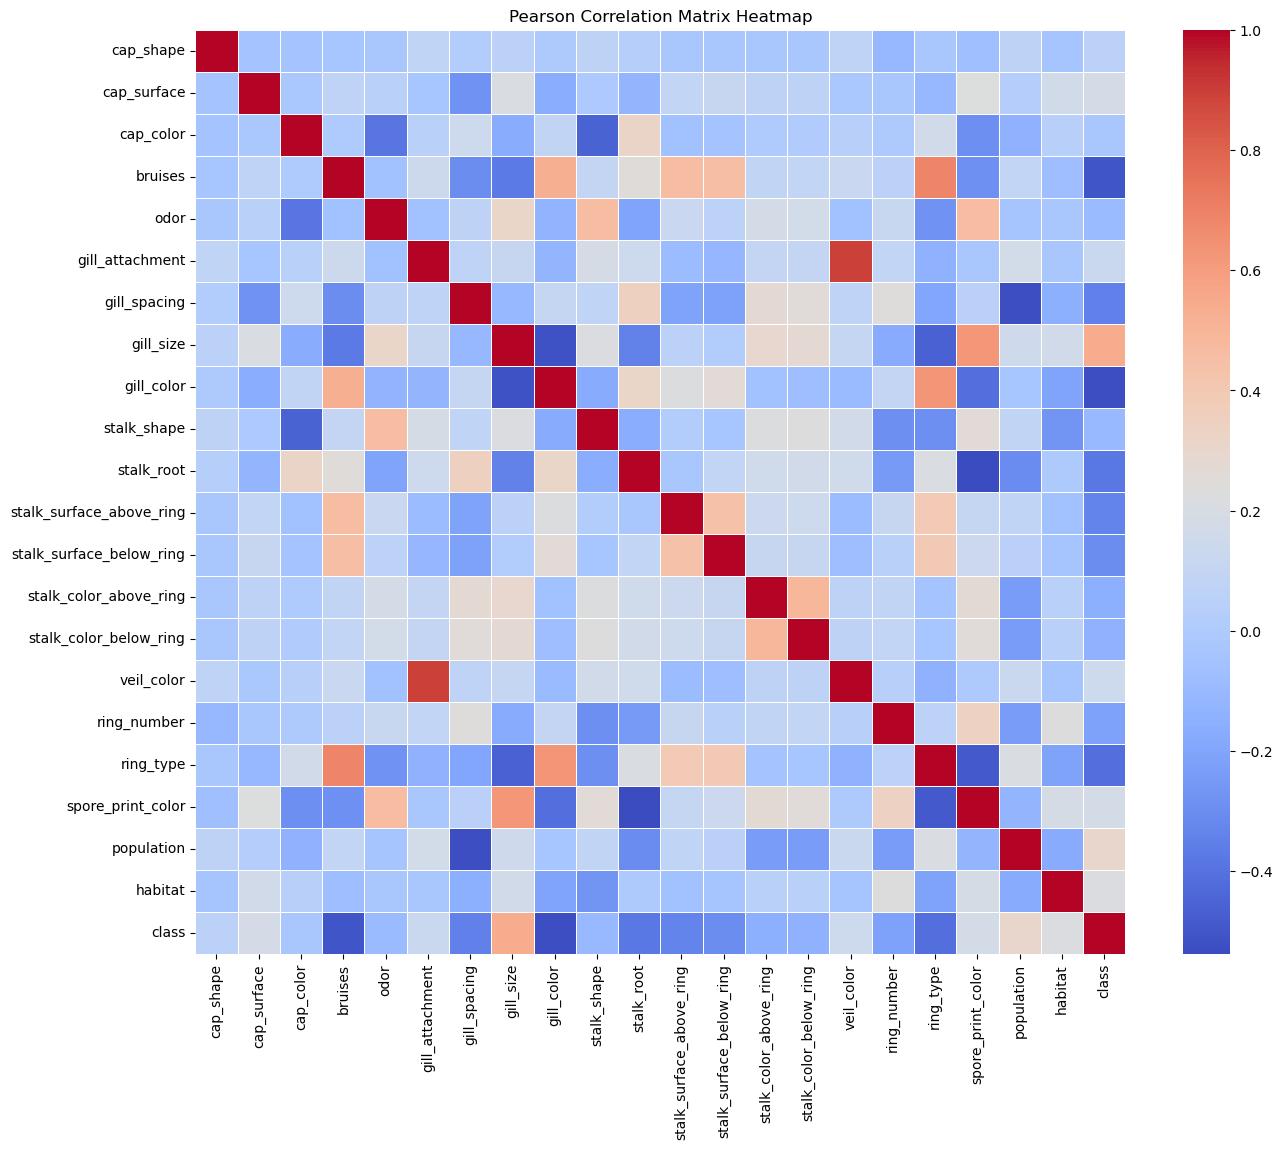

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Take encoded X from previous cell
X_encoded = X

# Remove 'veil_type' from the dataframe
X_encoded = X_encoded.drop('veil_type', axis=1)

# Encode the target variable 'class'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Concatenate the features (without 'veil_type') and encoded target variable for the correlation matrix
data_for_corr = pd.concat([X_encoded, pd.Series(y_encoded, name='class')], axis=1)

# Calculate the Pearson correlation matrix
correlation_matrix = data_for_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()


## Neural Network

In [7]:
#!pip install tensorflow
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
nn_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
history = nn_model.fit(X_train,y_train,epochs=10)

2023-12-08 19:03:24.786154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
204/204 [==============================] - 3s 4ms/step - loss: 0.2199 - accuracy: 0.9298
Epoch 2/10
204/204 [==============================] - 1s 4ms/step - loss: 0.1784 - accuracy: 0.9488
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1616 - accuracy: 0.9528
Epoch 4/10
204/204 [==============================] - 1s 4ms/step - loss: 0.1631 - accuracy: 0.9538
Epoch 5/10
204/204 [==============================] - 1s 4ms/step - loss: 0.1555 - accuracy: 0.9529
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.9525
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9563
Epoch 8/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1511 - accuracy: 0.9557
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1514 - accuracy: 0.9554
Epoch 10/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1495 - accuracy: 0.9554

In [8]:
#evaluation
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 115       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


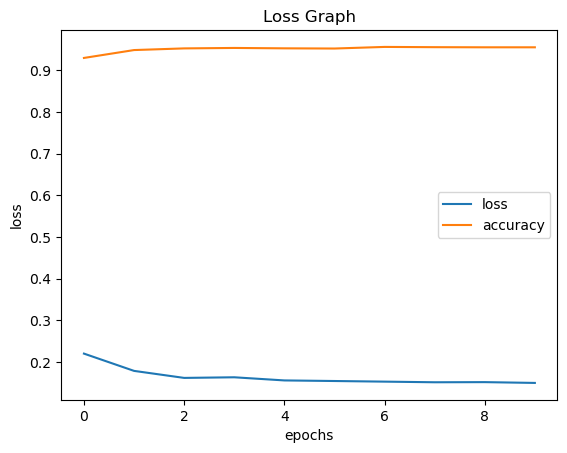

In [9]:
pd.DataFrame(history.history).plot()
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epochs');

In [10]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Converting probabilities to binary predictions

# Calculate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

51/51 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       843
           1       0.94      0.97      0.95       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



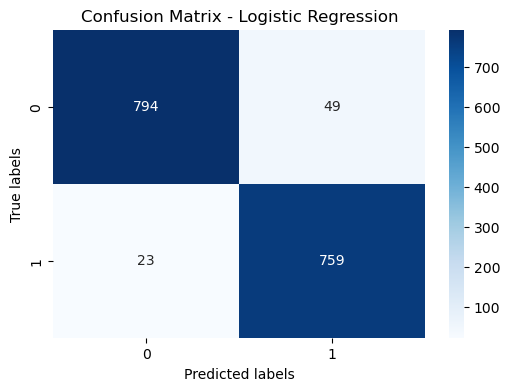

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

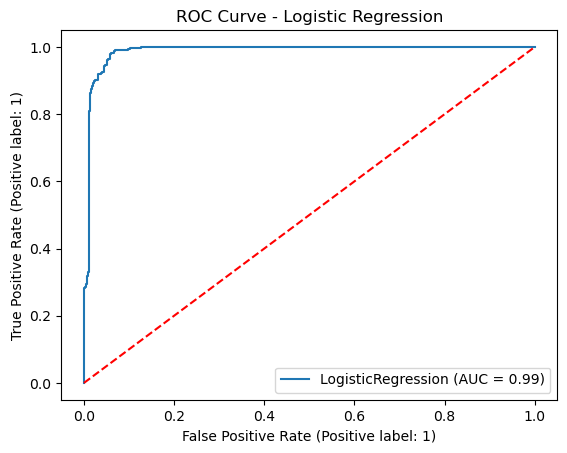

In [12]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# If you have an older version, run this instead of RocCurveDisplay:
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(logistic_model, X_test, y_test)
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)

plt.title('ROC Curve - Logistic Regression')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.legend(loc='lower right')
plt.show()

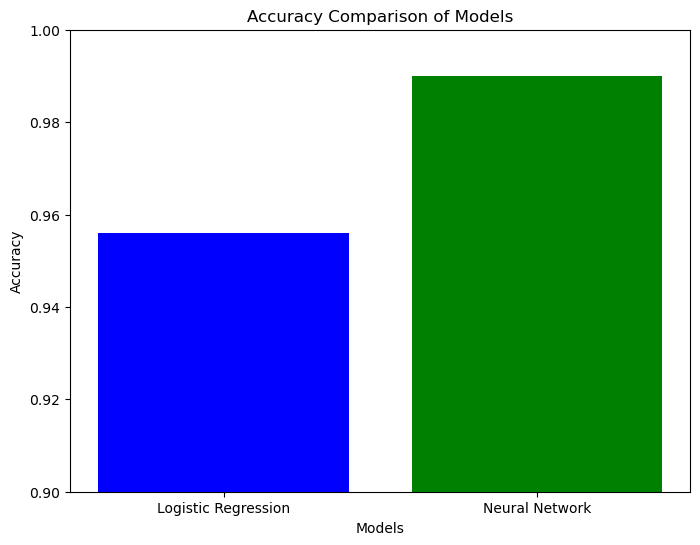

In [13]:
# Assuming you have accuracy scores for both models
logistic_regression_accuracy = 0.956
neural_network_accuracy = 0.99

# Model names for plotting
model_names = ['Logistic Regression', 'Neural Network']

# Corresponding accuracy scores
accuracy_scores = [logistic_regression_accuracy, neural_network_accuracy]

# Plotting the bar chart for accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits if necessary
plt.show()

# Pair Plot and Model Prediction Correctness Graph

In [14]:
# Reuses the trained Logistic model from an earlier cell
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Makes predictions on test set with Logistic Regression model
y_pred = log_model.predict(X_test)

# column 'prediction' in test set indicating correct or incorrect classification
X_test_with_predictions = X_test.copy()
X_test_with_predictions['prediction'] = np.where(y_pred == y_test, 'correct', 'incorrect')
pair_plot_data = pd.concat([X_test_with_predictions, y_test], axis=1)

/Users/camila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


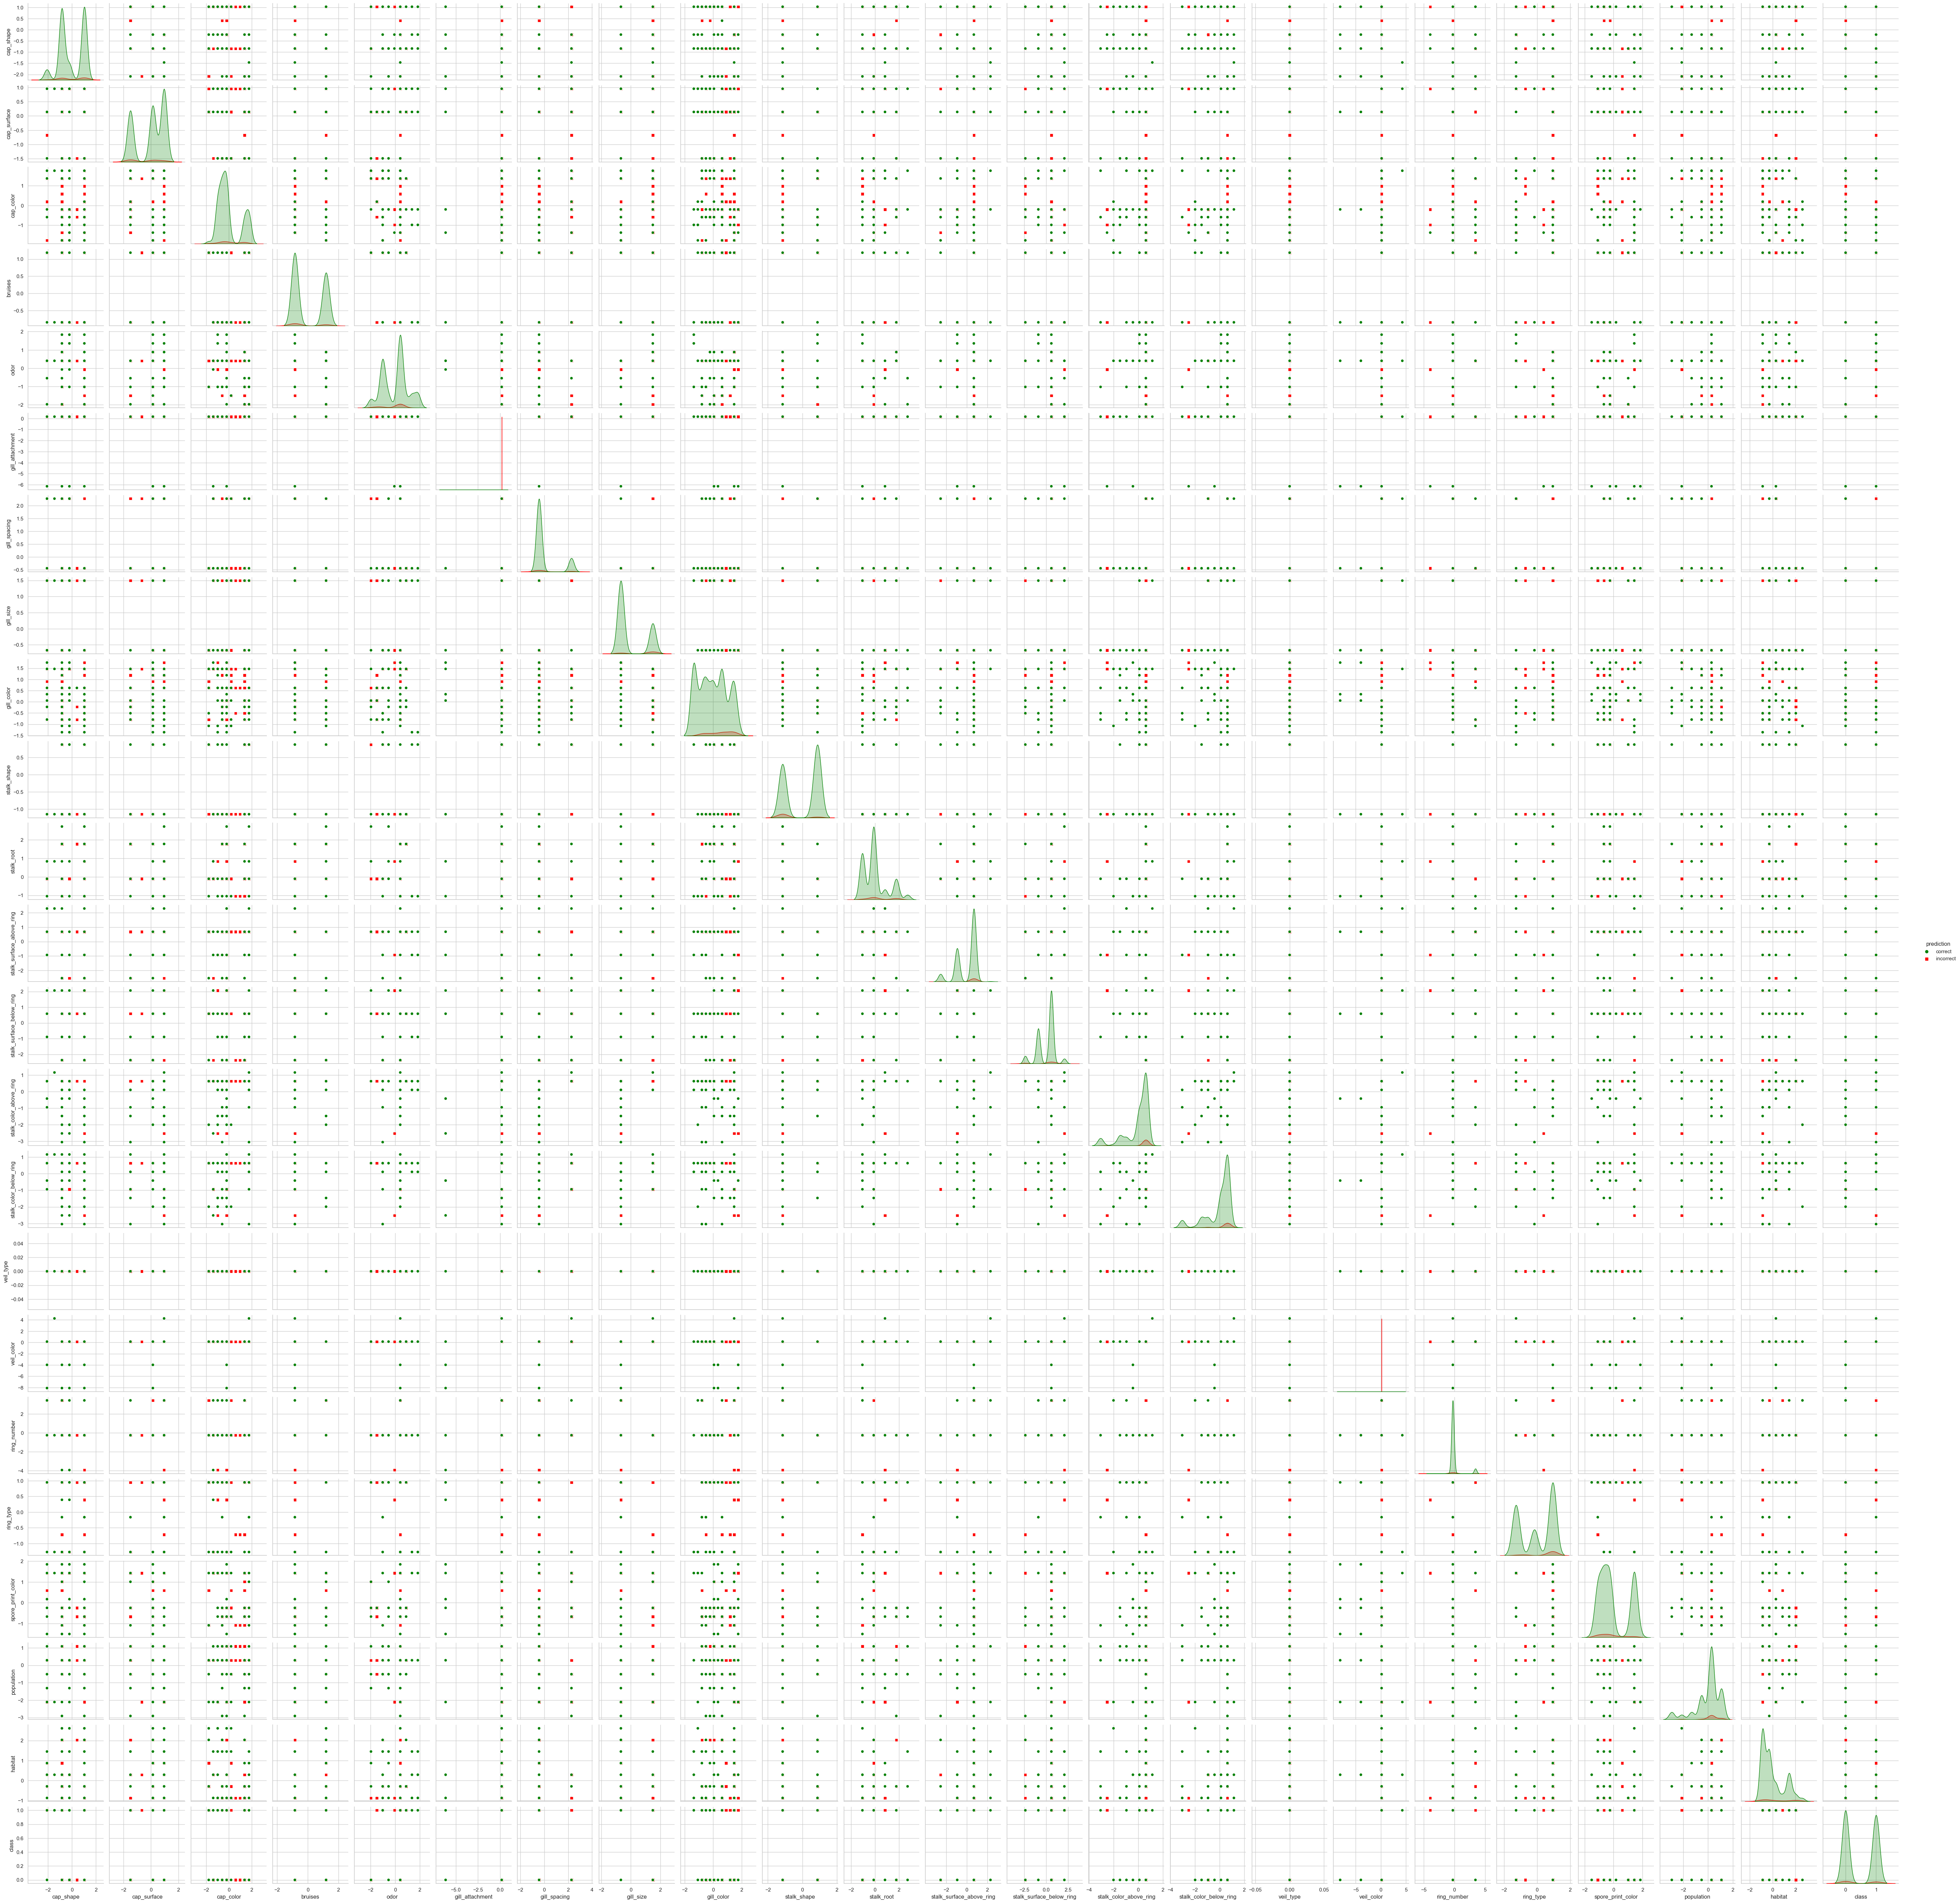

In [15]:
# Massive plot
sns.set(style="whitegrid")
pair_plot = sns.pairplot(pair_plot_data, hue='prediction', palette={'correct': 'green', 'incorrect': 'red'}, markers=['o', 's'])
plt.show()

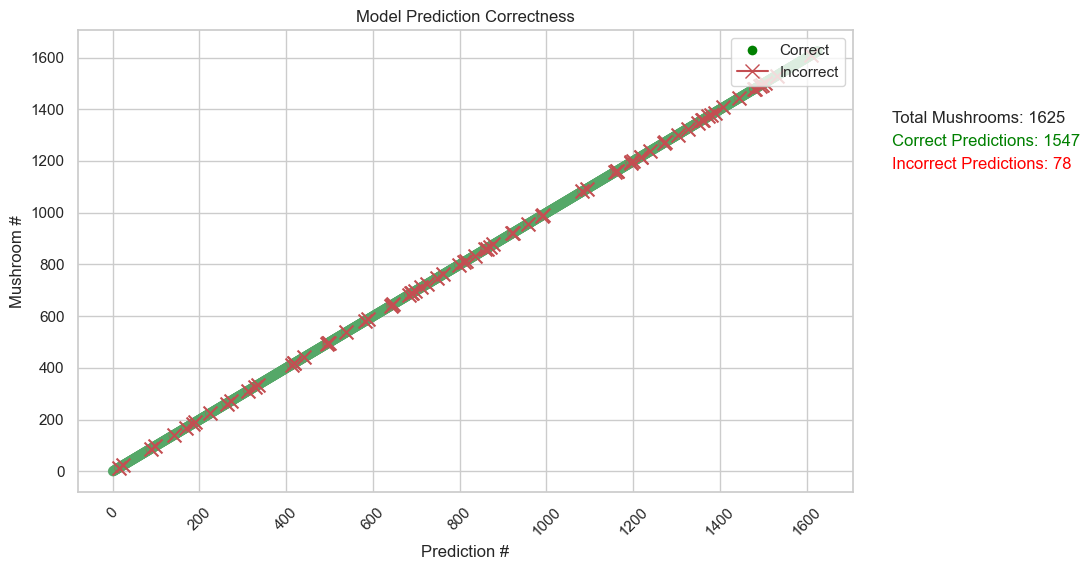

In [16]:
# Compare predictions
# data frame stores prediction correctness and corresponding mushroom numbers
y_pred = log_model.predict(X_test)
prediction_results = pd.DataFrame({'Prediction': range(1, len(y_test) + 1),
                                    'Correct': np.where(y_pred == y_test, 'Green', 'Red')})

# count total, correct, and incorrect predictions
total_mushrooms = len(y_test)
correct_predictions = np.sum(y_pred == y_test)
incorrect_predictions = total_mushrooms - correct_predictions

# scatter plot with color mapping
plt.figure(figsize=(10, 6))
colors = prediction_results['Correct'].map({'Green': 'g', 'Red': 'r'})
plt.scatter(prediction_results['Prediction'], prediction_results.index, c=colors, marker='o', s=40, label='Predictions', alpha=0.8)
incorrect_indices = prediction_results[prediction_results['Correct'] == 'Red'].index
plt.scatter(prediction_results.loc[incorrect_indices, 'Prediction'], incorrect_indices, c='r', marker='x', s=100, label='Incorrect Predictions')
plt.title('Model Prediction Correctness')
plt.xlabel('Prediction #')
plt.ylabel('Mushroom #')
plt.xticks(rotation=45)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Correct'),
                    plt.Line2D([0], [0], marker='x', color='r', markersize=10, label='Incorrect')],
           loc='upper right')
plt.grid(True)

# annotations for total, correct, and incorrect predictions
plt.annotate(f'Total Mushrooms: {total_mushrooms}', xy=(1.05, 0.8), xycoords='axes fraction', fontsize=12)
plt.annotate(f'Correct Predictions: {correct_predictions}', xy=(1.05, 0.75), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'Incorrect Predictions: {incorrect_predictions}', xy=(1.05, 0.7), xycoords='axes fraction', fontsize=12, color='red')

plt.show()